# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [72]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [73]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [74]:
sinasc_raw['ESCMAEAGR1']

0        12.0
1        12.0
2        12.0
3         8.0
4        12.0
         ... 
27023     8.0
27024     5.0
27025     6.0
27026     6.0
27027     5.0
Name: ESCMAEAGR1, Length: 27028, dtype: float64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [75]:
sinasc_lat = pd.cut(sinasc_raw['munResLat'], [-90, -10.5, 90])
sinasc_raw.groupby(sinasc_lat)[['QTDGESTANT','SEMAGESTAC']].agg(['sum','mean', 'min', 'median','max','std'])

QTDGESTANT                                       SEMAGESTAC  \
                      sum      mean  min median   max       std        sum   
munResLat                                                                    
(-90.0, -10.5]    15301.0  1.186032  0.0    1.0  15.0  1.304777   482665.0   
(-10.5, 90.0]     17615.0  1.364024  0.0    1.0  52.0  1.492482   511951.0   

                                                        
                     mean   min median   max       std  
munResLat                                               
(-90.0, -10.5]  38.545360  19.0   39.0  45.0  2.012435  
(-10.5, 90.0]   38.588302  21.0   39.0  45.0  2.020722

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [76]:
sinasc_area = pd.cut(sinasc_raw['munResArea'], [0, 3000, 3500])

In [77]:
sinasc_raw.groupby(sinasc_area)[['CONSPRENAT','QTDPARTNOR']].agg(['sum','mean', 'min', 'median','max','std'])

CONSPRENAT                                       QTDPARTNOR  \
                    sum      mean  min median   max       std        sum   
munResArea                                                                 
(0, 3000]       44775.0  8.709395  0.0    8.0  99.0  4.290017     1912.0   
(3000, 3500]     9677.0  8.356649  0.0    8.0  15.0  2.363235      541.0   

                                                    
                  mean  min median   max       std  
munResArea                                          
(0, 3000]     0.371334  0.0    0.0  10.0  0.856441  
(3000, 3500]  0.703511  0.0    0.0  41.0  1.843627

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [78]:
senasc_alt = pd.qcut(sinasc_raw['munResAlt'], 2)

In [79]:
sinasc_raw.groupby(senasc_alt)[['TPFUNCRESP','ESCMAEAGR1']].agg(['sum','mean', 'min', 'median','max','std'])

TPFUNCRESP                                      ESCMAEAGR1  \
                       sum      mean  min median  max       std        sum   
munResAlt                                                                    
(84.999, 153.0]    29574.0  2.174719  1.0    2.0  5.0  0.882944   105993.0   
(153.0, 595.0]     38966.0  2.916398  1.0    2.0  5.0  1.386300    82384.0   

                                                       
                     mean  min median   max       std  
munResAlt                                              
(84.999, 153.0]  7.877592  0.0    8.0  12.0  3.419479  
(153.0, 595.0]   6.183592  0.0    6.0  12.0  2.421674

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [80]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [86]:
sinasc_2 = sinasc_raw.set_index('munResNome')

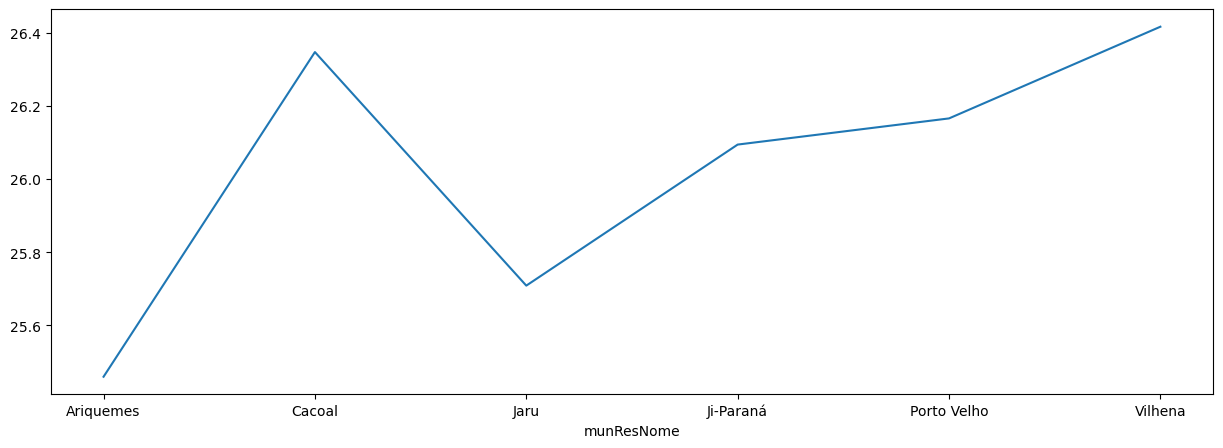

In [100]:
sinasc_2.groupby([imediatas])['IDADEMAE'].mean().plot(figsize=[15,5]);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [106]:
mapping = {
"Porto Velho" : "IDH alto",
"Vilhena":"IDH alto",
"Cacoal":"IDH alto",
"Ji-Paraná":"IDH alto",
"Pimenta Bueno":"IDH alto",
"Ariquemes":"IDH alto",
"Rolim de Moura":"IDH alto",
"Cerejeiras":"IDH médio",
"Jaru":"IDH médio",
"Colorado do Oeste":"IDH médio",
"Ouro Preto do Oeste":"IDH médio",
"Espigão d'Oeste":"IDH médio",
"Santa Luzia d'Oeste":"IDH médio",
"Pimenteiras do Oeste":"IDH médio",
"Presidente Médici":"IDH médio",
"Castanheiras":"IDH médio",
"Guajará-Mirim":"IDH médio",
"Chupinguaia":"IDH médio",
"Cabixi":"IDH médio",
"Candeias do Jamari":"IDH médio",
"São Felipe d'Oeste":"IDH médio",
"Cacaulândia":"IDH médio",
"São Miguel do Guaporé":"IDH médio",
"Mirante da Serra":"IDH médio",
"Alvorada d'Oeste":"IDH médio",
"Teixeirópolis"	:"IDH médio",
"Nova Brasilândia d'Oeste":"IDH médio",
"Rio Crespo":"IDH médio",
'Primavera de Rondônia':"IDH médio",
"Alta Floresta d'Oeste":"IDH médio",
"Ministro Andreazza":"IDH médio",
"Novo Horizonte do Oeste":"IDH médio",
"Vale do Paraíso":"IDH médio",
"Alto Paraíso":"IDH médio",
"Parecis":"IDH médio",
"Buritis":"IDH médio",
"Itapuã do Oeste":"IDH médio",
"Corumbiara":"IDH médio",
"Cujubim":"IDH médio",
"Costa Marques":"IDH médio",
"São Francisco do Guaporé":"IDH médio",
"Urupá":"IDH médio",
"Monte Negro":"IDH médio",
"Seringueiras":"IDH baixo",
"Governador Jorge Teixeira":"IDH baixo",
"Machadinho d'Oeste":"IDH baixo",
"Campo Novo de Rondônia":"IDH baixo",
"Alto Alegre dos Parecis":"IDH baixo",
"Theobroma":"IDH baixo",
"Nova União":"IDH baixo",
"Nova Mamoré":"IDH baixo",
"Vale do Anari":"IDH baixo"
}
sinasc_2.index.names = ['ClassIDH']
sinasc_2.groupby([mapping])[['QTDFILVIVO', 'IDADEMAE', 'PESO']].mean()

,QTDFILVIVO,IDADEMAE,PESO
ClassIDH,,,
IDH alto,1.033960,26.280332,3245.623791
IDH baixo,1.056270,25.269231,3244.309955
IDH médio,1.093111,25.848191,3245.670333


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [107]:
mapping = {
"Ariquemes": "Moderado",
"Vilhena": "Moderado",
"Pimenta Bueno": "Moderado",
"Porto Velho": "Moderado",
"Ji-Paraná": "Moderado",
"Cacoal": "Moderado",
"Santa Luzia d'Oeste": "Moderado",
"Rolim de Moura": "Moderado",
"Chupinguaia": "Moderado",
"São Miguel do Guaporé": "Moderado",
"Pimenteiras do Oeste": "Moderado",
"Teixeirópolis": "Moderado",
"Colorado do Oeste": "Moderado",
"Jaru": "Moderado",
"Rio Crespo": "Moderado",
"Primavera de Rondônia": "Moderado",
"Alta Floresta d'Oeste": "Moderado",
"Ouro Preto do Oeste": "Moderado",
"São Francisco do Guaporé": "Moderado",
"Candeias do Jamari": "Moderado",
"Buritis": "Moderado",
"São Felipe d'Oeste": "Moderado",
"Presidente Médici": "Moderado",
"Cerejeiras": "Moderado",
"Monte Negro": "Moderado",
"Urupá": "Moderado",
"Espigão d'Oeste": "Regular",
"Seringueiras": "Regular",
"Alvorada d'Oeste": "Regular",
"Itapuã do Oeste": "Regular",
"Cabixi": "Regular",
"Novo Horizonte do Oeste": "Regular",
"Nova Brasilândia d'Oeste": "Regular",
"Vale do Paraíso": "Regular",
"Corumbiara": "Regular",
"Alto Paraíso": "Regular",
"Cacaulândia": "Regular",
"Vale do Anari": "Regular",
"Ministro Andreazza": "Regular",
"Costa Marques": "Regular",
"Nova União": "Regular",
"Guajará-Mirim": "Regular",
"Mirante da Serra": "Regular",
"Parecis": "Regular",
"Castanheiras": "Regular",
"Theobroma": "Regular",
"Machadinho d'Oeste": "Regular",
"Campo Novo de Rondônia": "Regular",
"Nova Mamoré": "Regular",
"Cujubim": "Regular",
"Alto Alegre dos Parecis": "Regular",
"Governador Jorge Teixeira": "Regular"
}
sinasc_2.index.names = ['ClassIFDM']
sinasc_2.groupby([mapping])[['QTDGESTANT']].mean()

,QTDGESTANT
ClassIFDM,
Moderado,1.262372
Regular,1.398780


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [113]:
mapping = {
"Porto Velho": "Acima de 1 Bilhão",
"Ji-Paraná": "Acima de 1 Bilhão",
"Vilhena": "Acima de 1 Bilhão",
"Ariquemes": "Acima de 1 Bilhão",
"Cacoal": "Acima de 1 Bilhão",
"Jaru": "Acima de 1 Bilhão",
"Rolim de Moura": "Acima de 1 Bilhão",
"Pimenta Bueno": "Acima de 1 Bilhão",
"Guajará-Mirim": "Acima de 500 milhões",
"Ouro Preto do Oeste": "Acima de 500 milhões",
"Buritis": "Acima de 500 milhões",
"Machadinho do Oeste": "Acima de 500 milhões",
"Espigão d'Oeste": "Acima de 500 milhões",
"São Miguel do Guaporé": "Acima de 500 milhões",
"Candeias do Jamari": "Acima de 500 milhões",
"Nova Mamoré": "Acima de 500 milhões",
"Cerejeiras": "Acima de 500 milhões",
"Alta Floresta do Oeste": "Acima de 300 Milhões",
"Presidente Médici": "Acima de 300 Milhões",
"Cujubim": "Acima de 300 Milhões",
"Nova Brasilândia do Oeste": "Acima de 300 Milhões",
"Alto Paraíso": "Acima de 300 Milhões",
"São Francisco do Guaporé": "Acima de 300 Milhões",
"Colorado do Oeste": "Acima de 300 Milhões",
"Monte Negro": "Acima de 200 Milhões",
"Alto Alegre dos Parecis": "Acima de 200 Milhões",
"Campo Novo de Rondônia": "Acima de 200 Milhões",
"Alvorada do Oeste": "Acima de 200 Milhões",
"Chupinguaia": "Acima de 100 Milhões",
"Corumbiara": "Acima de 100 Milhões",
"Ministro Andreazza": "Acima de 100 Milhões",
"Urupá": "Acima de 100 Milhões",
"Costa Marques": "Acima de 100 Milhões",
"Seringueiras": "Acima de 100 Milhões",
"Mirante da Serra": "Acima de 100 Milhões",
"Governador Jorge Teixeira": "Acima de 100 Milhões",
"Theobroma": "Acima de 100 Milhões",
"Santa Luzia do Oeste": "Acima de 100 Milhões",
"Novo Horizonte do Oeste": "Acima de 100 Milhões",
"Itapuã do Oeste": "Acima de 100 Milhões",
"Vale do Paraíso": "Acima de 100 Milhões",
"Cacaulândia": "Acima de 100 Milhões",
"Cabixi": "Acima de 100 Milhões",
"Vale do Anari": "Acima de 100 Milhões",
"Nova União": "Até 100 Milhões",
"Parecis": "Até 100 Milhões",
"Rio Crespo": "Até 100 Milhões",
"Pimenteiras do Oeste": "Até 100 Milhões",
"Teixeirópolis": "Até 100 Milhões",
"São Felipe do Oeste": "Até 100 Milhões",
"Castanheiras": "Até 100 Milhões",
"Primavera de Rondônia": "Até 100 Milhões"
}
sinasc_2.index.names = ['ClassPIB']
sinasc_2.groupby([mapping])[['QTDFILVIVO']].mean()

,QTDFILVIVO
ClassPIB,
Acima de 1 Bilhão,1.026435
Acima de 100 Milhões,0.992320
Acima de 200 Milhões,1.010526
Acima de 300 Milhões,1.062097
Acima de 500 milhões,1.228385
Até 100 Milhões,1.032258


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Pode-se inferir que a média da idade da mãe tende a ser maior quando o IDH do município é maior